<a href="https://colab.research.google.com/github/sbolivara16/RdkitTools/blob/main/FingerPrint_Rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📚  **Harnessing the Potential of Molecular Fingerprinting for Virtual Screening and Drug Discovery in silico**

**Santiago Bolivar A, Qco, M.Sc, Ph.D (c) Conicet, National University of Rosario, Argentina**


Check this and other notebooks on my github profile 🔍📚✅💻[GitHUB profile](https://github.com/sbolivara16) 

Welcome to this notebook, where we will explore the fascinating world of molecular fingerprinting and its significance in in silico studies! Molecular fingerprinting, also known as molecular representation, plays a crucial role in various areas of computational chemistry and drug discovery.

🔍 The Importance of Molecular Fingerprinting

Molecular fingerprinting provides a compact and unique representation of chemical structures, enabling efficient comparison and analysis of molecules. It serves as a powerful tool for virtual screening, similarity searching, lead optimization, and prediction of various molecular properties. By capturing key structural features and properties of molecules, fingerprints allow researchers to explore large compound libraries and select the most promising ones.

💡 What We Will Learn in This Notebook

In this notebook, we will learn how to calculate and utilize molecular fingerprinting, specifically the Morgan fingerprint, one of the most popular and effective fingerprints. We will explore how these fingerprints capture important structural information and molecular characteristics, and how they can be applied in various in silico studies such as searching for similar compounds, molecular similarity analysis, and drug design.

📝 Using RDKit

Throughout this notebook, we will be using RDKit, a powerful open-source cheminformatics library, to perform our molecular fingerprinting calculations and analyses. RDKit provides a wide range of functions and tools that make it easy to work with molecules and extract valuable insights.

🔬 Share this Notebook

Sharing this notebook is of great importance as it will allow many people to access this valuable resource and expand their knowledge of molecular fingerprinting and its application in computational chemistry and drug discovery. So feel free to share this notebook with your colleagues and friends interested in the field!

🔬 Let's embark on this exciting journey into the world of molecular fingerprinting and its impact on in silico studies!

notebook based on: [RDkit Blog, created for Dr Greg Landrum](https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html)



In [1]:
#install the libraries
!pip install rdkit
!pip install pillow



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 15.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The provided code performs the following actions:

1. It imports the Chem module from the RDKit library.

2. It defines the ruta_archivo variable, which represents the path of the .sdf file containing the desired data.

3. It uses the Chem.SDMolSupplier() function to load the .sdf file and obtain a molecule supplier object.

4. It uses the next() function to retrieve the first molecule from the molecule supplier.

5. It uses the Chem.MolToSmiles() function to obtain the SMILES representation of the molecule.

6. It prints the obtained SMILES on the screen.

In [2]:
from rdkit import Chem

# Path of the .sdf file
ruta_archivo = 'EV6Bj_1008.sdf'

# Upload the .sdf file
suppl = Chem.SDMolSupplier(ruta_archivo)

# Get the first molecule from the file
mol = next(suppl)

# Get the SMILES of the molecule
smiles = Chem.MolToSmiles(mol)

# Print smile
print("SMILES:", smiles)



SMILES: O[C@H]1CCC=C(C2=C3C[C@@H](n4cc(-c5cccnc5)cn4)CC[C@@H]3[C@H](O)N2)C1


This code performs a similarity search using MACCS fingerprints to find molecules in a given database that are structurally similar to a target molecule. Here's a brief explanation of what the code does:

1. The target molecule of interest is loaded using its SMILES representation.

2. A database of molecules is loaded from an SDF file.

3. MACCS fingerprints are generated for the target molecule.

4. For each molecule in the database, MACCS fingerprints are calculated and compared with the target molecule's fingerprint using a similarity metric.

5. If the similarity between a molecule and the target molecule exceeds a specified threshold, the molecule is considered similar and its name and similarity score are stored.

6. The similar molecules are sorted based on their similarity scores in descending order.

7. The results, including the name and similarity score of each similar molecule, are printed.

**In summary, the code identifies molecules in the given database that exhibit a structural similarity above the specified threshold to the target molecule and outputs the results.**

In [3]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

# Load the target molecule
mol_interest = Chem.MolFromSmiles('O[C@H]1CCC=C(C2=C3C[C@@H](n4cc(-c5cccnc5)cn4)CC[C@@H]3[C@H](O)N2)C1')

# Load the database
suppl = Chem.SDMolSupplier('/content/allcompoundscurados.sdf')

# Generate fingerprints for the target molecule
fp_interest = MACCSkeys.GenMACCSKeys(mol_interest)

# Calculate structural similarity
similarity_threshold = 0.8  # Set desired similarity threshold
similar_molecules = []
for mol in suppl:
    if mol is not None:
        fp = MACCSkeys.GenMACCSKeys(mol)
        similarity = DataStructs.FingerprintSimilarity(fp, fp_interest)
        if similarity >= similarity_threshold:
            similar_molecules.append((mol.GetProp("_Name"), similarity))

# Sort the results by descending similarity
similar_molecules = sorted(similar_molecules, key=lambda x: x[1], reverse=True)

# Print the results
for name, similarity in similar_molecules:
    print(f"Molecule: {name}, Similarity: {similarity}")

# Print the found similar molecules
print(f"Found {len(similar_molecules)} similar molecules in the database:")
for mol in similar_molecules:
    print(Chem.MolToSmiles(mol))

[15:25:41] Explicit valence for atom # 4 O, 3, is greater than permitted
[15:25:41] ERROR: Could not sanitize molecule ending on line 9475
[15:25:41] ERROR: Explicit valence for atom # 4 O, 3, is greater than permitted


Found 0 similar molecules in the database:


This code snippet demonstrates the use of RDKit library to extract the Murcko scaffold, which represents the core structure of a molecule. The code takes a SMILES string representing a molecule of interest, converts it into a molecule object, and then retrieves the Murcko scaffold from it. The Murcko scaffold is the simplified framework of a molecule obtained by removing all side chains and keeping only the core structure. Finally, it generates a 2D image of the Murcko scaffold and displays it. This code is useful for analyzing the common structural features or scaffolds among a set of molecules.






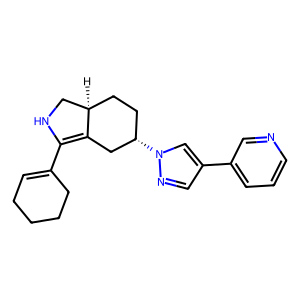

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

# SMILES of the molecule of interest
smiles_interest = 'O[C@H]1CCC=C(C2=C3C[C@@H](n4cc(-c5cccnc5)cn4)CC[C@@H]3[C@H](O)N2)C1'

# Convert the SMILES into a molecule object
mol_interest = Chem.MolFromSmiles(smiles_interest)

# Retrieve the structural scaffold of the molecule of interest
scaffold = MurckoScaffold.GetScaffoldForMol(mol_interest)

# Generate a 2D image of the structural scaffold
img = Draw.MolToImage(scaffold)

# Show the image
img.show()



🔬 This code generates various types of MolHashes (molecular fingerprints) for a given molecule and prints them out.

MolHashes are unique numerical representations or codes generated from the molecular structure. Each type of MolHash provides specific information about the molecule and is used for various purposes in computational chemistry and molecular data mining.

Here's a brief explanation of some of the MolHashes generated in the code and how to interpret their information:

🌐 AnonymousGraph: It represents the molecular structure without specific atom information. It is useful for comparing structural similarity between molecules without considering individual atom details.

🔤 CanonicalSmiles: It is a canonical representation of the molecular structure in the form of SMILES (Simplified Molecular Input Line Entry System). It provides a unique and standardized way to represent the molecule.

🧩 MurckoScaffold: It is the structural core or scaffold of the molecule. It represents the main central part of the structure, removing functional groups and branches. It is useful for identifying structural similarities and performing structure-activity analysis.

⚛️ MolFormula: It is the molecular formula of the molecule, indicating the quantity and type of atoms present.

🔢 AtomBondCounts: It provides the count of atoms and bonds in the molecule.

Each type of MolHash offers a unique perspective on the molecule and can be used for different analyses and applications in chemistry and life sciences. The choice of which MolHash to use depends on the context and specific research or analysis goal. 🧪🔍

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdMolHash
import rdkit

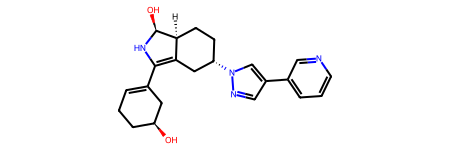

In [ ]:
s = Chem.MolFromSmiles('SMILE OF YOUR INTEREST')
s

In [ ]:
#  View all of the MolHash hashing functions types with the names method.
molhashf = rdMolHash.HashFunction.names
print(molhashf)

{'AnonymousGraph': rdkit.Chem.rdMolHash.HashFunction.AnonymousGraph, 'ElementGraph': rdkit.Chem.rdMolHash.HashFunction.ElementGraph, 'CanonicalSmiles': rdkit.Chem.rdMolHash.HashFunction.CanonicalSmiles, 'MurckoScaffold': rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold, 'ExtendedMurcko': rdkit.Chem.rdMolHash.HashFunction.ExtendedMurcko, 'MolFormula': rdkit.Chem.rdMolHash.HashFunction.MolFormula, 'AtomBondCounts': rdkit.Chem.rdMolHash.HashFunction.AtomBondCounts, 'DegreeVector': rdkit.Chem.rdMolHash.HashFunction.DegreeVector, 'Mesomer': rdkit.Chem.rdMolHash.HashFunction.Mesomer, 'HetAtomTautomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomTautomer, 'HetAtomProtomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomProtomer, 'RedoxPair': rdkit.Chem.rdMolHash.HashFunction.RedoxPair, 'Regioisomer': rdkit.Chem.rdMolHash.HashFunction.Regioisomer, 'NetCharge': rdkit.Chem.rdMolHash.HashFunction.NetCharge, 'SmallWorldIndexBR': rdkit.Chem.rdMolHash.HashFunction.SmallWorldIndexBR, 'SmallWorldIndexBRL': r

In [ ]:
# Generate MolHashes for molecule 's' with all defined hash functions.
for i, j in molhashf.items():
    print(i, rdMolHash.MolHash(s, j))

AnonymousGraph **1****(*2*[*@](*)*3**[*@@](*4***(*5*****5)*4)**23)*1
ElementGraph O[C@H]1CCCC(C2N[C@@H](O)[C@H]3CC[C@H](N4CC(C5CCCNC5)CN4)CC23)C1
CanonicalSmiles O[C@H]1CCC=C(C2=C3C[C@@H](n4cc(-c5cccnc5)cn4)CC[C@@H]3[C@H](O)N2)C1
MurckoScaffold C1=C(C2=C3C[C@@H](n4cc(-c5cccnc5)cn4)CC[C@@H]3CN2)CCCC1
ExtendedMurcko *[C@H]1CCC=C(C2=C3C[C@@H](n4cc(-c5cccnc5)cn4)CC[C@@H]3[C@H](*)N2)C1
MolFormula C22H26N4O2
AtomBondCounts 28,32
DegreeVector 0,10,16,2
Mesomer O[C@H]1CC[CH][C]([C]2N[C@@H](O)[C@H]3CC[C@H](N4[CH][C]([C]5[CH][CH][CH][N][CH]5)[CH][N]4)C[C]23)C1_0
HetAtomTautomer [O][C@H]1CC[CH][C]([C]2[N][C@@H]([O])[C@H]3CC[C@H](N4[CH][C]([C]5[CH][CH][CH][N][CH]5)[CH][N]4)C[C]23)C1_3_0
HetAtomProtomer [O][C@H]1CC[CH][C]([C]2[N][C@@H]([O])[C@H]3CC[C@H](N4[CH][C]([C]5[CH][CH][CH][N][CH]5)[CH][N]4)C[C]23)C1_3
RedoxPair O[C@H]1CC[CH][C]([C]2N[C@@H](O)[C@H]3CC[C@H](N4[CH][C]([C]5[CH][CH][CH][N][CH]5)[CH][N]4)C[C]23)C1
Regioisomer *O.*O.C1=C2CCCC[C@@H]2CN1.C1=CCCCC1.c1ccncc1.c1cn[nH]c1
NetCharge 0
Smal

🧪🔍 This code creates a molecule using the SMILES representation '**Regioisomer result (copy and past this information of your molecule**' and assigns it to the variable 'r0_regioHash_mol'. The SMILES string represents a complex molecular structure with multiple components.

The purpose of this code is to initialize a molecule object for further analysis or manipulation. The resulting molecule can be used for various tasks such as calculating properties, performing chemical reactions, or generating molecular descriptors.

ℹ️🔬 SMILES is a compact text-based representation of a molecule that encodes its chemical structure. By providing a SMILES string, the code creates the corresponding molecule object, which can be further utilized in computational chemistry and drug discovery research.

It's important to note that the code snippet shown here only creates the molecule object and does not perform any specific operations on it. The subsequent use of the 'r0_regioHash_mol' variable will depend on the specific requirements of the analysis or workflow being implemented.

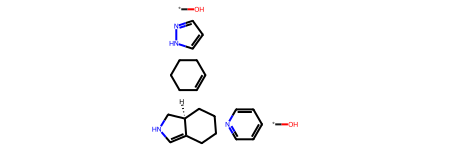

In [ ]:
r0_regioHash_mol = Chem.MolFromSmiles('*O.*O.C1=C2CCCC[C@@H]2CN1.C1=CCCCC1.c1ccncc1.c1cn[nH]c1')
r0_regioHash_mol

🔬🔑 This code snippet utilizes the RDKit library to generate a molecular fingerprint for a given chemical structure.

🔬👉 The code performs the following steps:
1️⃣ It imports the necessary modules from the RDKit library, including the Chem module for molecule handling and the rdFingerprintGenerator module for fingerprint generation.
2️⃣ A fingerprint generator object, specifically for Morgan fingerprints, is created using the rdFingerprintGenerator.GetMorganGenerator() function. The generator is configured with a radius of 2 and a fingerprint size of 2048.
3️⃣ An example SMILES string representing a chemical structure is defined.
4️⃣ The SMILES string is converted into an RDKit molecule using the Chem.MolFromSmiles() function.
5️⃣ The fingerprint generator is used to generate the molecular fingerprint for the molecule with the mfpgen.GetFingerprint() function.
6️⃣ The generated fingerprint is printed to the console.

🔍🧬 Molecular fingerprints are compact numerical representations of chemical structures that capture information about the presence or absence of specific structural features. They are widely used in chemoinformatics and drug discovery for tasks such as similarity searching, clustering, and machine learning modeling.

🖐️ In this code, the Morgan fingerprint, a type of circular fingerprint, is generated for the given molecule. The generated fingerprint can be interpreted as a series of binary bits representing the presence (1) or absence (0) of specific structural features within the molecule.

⚠️ It's important to note that the printed fingerprint may appear as a series of numbers or characters, depending on the specific implementation of the fingerprint generation algorithm.

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

# Create a Morgan molecular fingerprint generator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Define an example SMILES
smiles = 'O[C@H]1CCC=C(C2=C3C[C@@H](n4cc(-c5cccnc5)cn4)CC[C@@H]3[C@H](O)N2)C1'

# Convert the SMILES to an RDKit molecule
mol = Chem.MolFromSmiles(smiles)

# Generate the molecular fingerprint using the generator
fingerprint = mfpgen.GetFingerprint(mol)

# Print the molecular fingerprint
print(fingerprint)



In [ ]:
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=2048)
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)

In [ ]:
fmgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2,
                  atomInvariantsGenerator=rdFingerprintGenerator.GetMorganFeatureAtomInvGen())

🔬 The code performs the following tasks:

1️⃣ It imports the necessary module, rdkit.Chem, from the RDKit library.
2️⃣ It defines a reference molecule, ms, using a SMILES representation.
3️⃣ It generates different types of fingerprints for the reference molecule, including RDKit fingerprint (rdkfp), Atom Pair fingerprint (apfp), and Topological Torsion fingerprint (ttfp).

🧬 Fingerprints are compact representations of molecular structures used for similarity searching, clustering, and machine learning in cheminformatics. They encode important structural features of molecules and allow for efficient comparison and analysis.

🔍 This code specifically generates three types of fingerprints using different algorithms implemented in RDKit. Each fingerprint represents the structural characteristics of the reference molecule in a unique way, capturing different aspects of its chemical structure.

📊 The generated fingerprints can be used for various purposes, such as virtual screening, similarity-based clustering, or building predictive models in drug discovery and chemical informatics.

🧪 By generating multiple fingerprints, researchers can explore and compare different representations of the molecule to determine which fingerprinting method is most suitable for their specific analysis or application.

**Don't forget to write your smile where I highlight you**


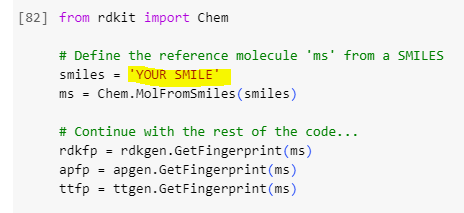

In [ ]:
from rdkit import Chem

# Define the reference molecule 'ms' from a SMILES
smiles = 'YOUR SMILE'
ms = Chem.MolFromSmiles(smiles)

# Continue with the rest of the code...
rdkfp = rdkgen.GetFingerprint(ms)
apfp = apgen.GetFingerprint(ms)
ttfp = ttgen.GetFingerprint(ms)



In [ ]:
rdk5gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5, fpSize=2048)
rdk5gen.GetFingerprint(ms).GetNumOnBits(), rdkgen.GetFingerprint(ms).GetNumOnBits()


(434, 1111)

In [ ]:
help(rdFingerprintGenerator.GetRDKitFPGenerator)

Help on built-in function GetRDKitFPGenerator in module rdkit.Chem.rdFingerprintGenerator:

GetRDKitFPGenerator(...)
    GetRDKitFPGenerator([  (int)minPath=1 [, (int)maxPath=7 [, (bool)useHs=True [, (bool)branchedPaths=True [, (bool)useBondOrder=True [, (bool)countSimulation=False [, (AtomPairsParameters)countBounds=None [, (int)fpSize=2048 [, (int)numBitsPerFeature=2 [, (AtomPairsParameters)atomInvariantsGenerator=None]]]]]]]]]]) -> FingeprintGenerator64 :
        Get an RDKit fingerprint generator
        
          ARGUMENTS:
            - minPath: the minimum path length (in bonds) to be included
            - maxPath: the maximum path length (in bonds) to be included
            - useHs: toggles inclusion of Hs in paths (if the molecule has explicit Hs)
            - branchedPaths: toggles generation of branched subgraphs, not just linear paths
            - useBondOrder: toggles inclusion of bond orders in the path hashes
            - countSimulation:  if set, use count simulat

now what we will do is the provided code segment generates a Morgan fingerprint for a ligand molecule using the RDKit library. The Morgan fingerprint captures the chemical environment around each atom in the molecule. In addition to the fingerprint, the code also retrieves supplementary information such as the bit information map, atom counts, and atom-to-bits mapping. This additional information provides insights into the structural features encoded in the fingerprint, the distribution of different atom types, and the correspondence between atoms and fingerprint bits. These details can be valuable for tasks like substructure searching, similarity analysis, and cheminformatics modeling.

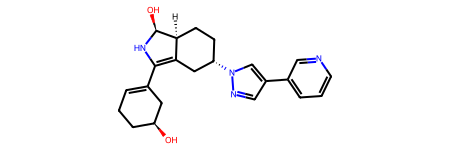

In [4]:
LigandSmile = Chem.MolFromSmiles('O[C@H]1CCC=C(C2=C3C[C@@H](n4cc(-c5cccnc5)cn4)CC[C@@H]3[C@H](O)N2)C1')
LigandSmile

In [6]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
mfp1gen = rdFingerprintGenerator.GetMorganGenerator(radius=1)

ao = rdFingerprintGenerator.AdditionalOutput()
# we have to ask for the information we're interested in by allocating space for it:
ao.AllocateAtomCounts()
ao.AllocateAtomToBits()
ao.AllocateBitInfoMap()

fp = mfp1gen.GetFingerprint(LigandSmile,additionalOutput=ao)
ao.GetBitInfoMap()
ao.GetAtomCounts()
ao.GetAtomToBits()

((807, 1257),
 (1019, 590),
 (926, 1325),
 (926, 1147),
 (1873, 1781),
 (1380, 296),
 (1380, 1319),
 (1380, 916),
 (926, 231),
 (1019, 1910),
 (935, 965),
 (1873, 464),
 (1380, 1160),
 (1380, 1160),
 (1873, 1750),
 (1873, 1088),
 (1873, 1866),
 (378, 1603),
 (1873, 1535),
 (1873, 1535),
 (378, 43),
 (926, 1325),
 (926, 1325),
 (1019, 455),
 (1019, 1284),
 (807, 1257),
 (1114, 301),
 (926, 231))

We will include our database of interest to search for molecules, do not forget to include the route, if you do not know how to do it, I will teach you:

For example, I want to know the path of the database that I highlighted, I simply right click on it and then copy path. We paste this as shown in the following image


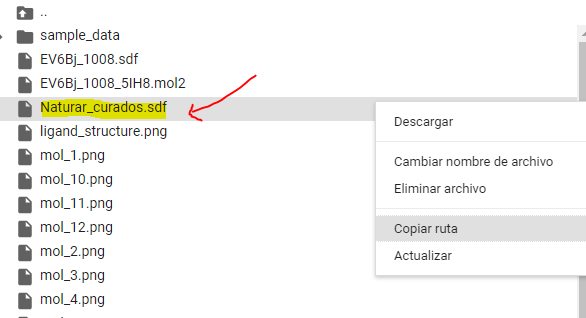

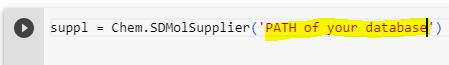

In [ ]:
suppl = Chem.SDMolSupplier('PATH of your database')


In [ ]:
LigandSmile = Chem.MolFromSmiles('your smile')
mfp1gen = rdFingerprintGenerator.GetMorganGenerator(radius=1)
fp = mfp1gen.GetFingerprint(LigandSmile, additionalOutput=ao)


Here I have set a threshold of 0.20, ideally it should be greater than 0.7, modify it according to your needs

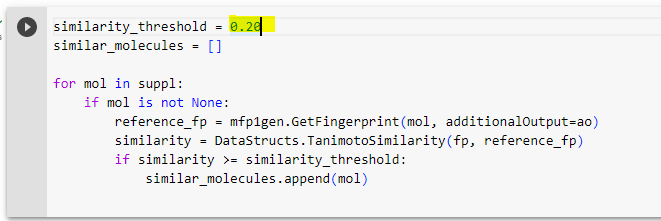


In [ ]:
similarity_threshold = 0.20
similar_molecules = []

for mol in suppl:
    if mol is not None:
        reference_fp = mfp1gen.GetFingerprint(mol, additionalOutput=ao)
        similarity = DataStructs.TanimotoSimilarity(fp, reference_fp)
        if similarity >= similarity_threshold:
            similar_molecules.append(mol)


The following code will export the similes of the molecules that share that threshold

In [ ]:
for mol in similar_molecules:
    print(Chem.MolToSmiles(mol))


Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2
C[C@@H]1C[C@H]2Cc3ncccc3[C@]3(C1)NCCC[C@H]23
C[C@@H]1C[C@H]2Cc3ncccc3[C@@]3(C1)[C@@H]2CCCN3C
CC(=O)N1CCC[C@@H]2[C@@H]3Cc4ncccc4[C@@]21C[C@H](C)C3
O=C(/C=C/c1ccccc1)NCCc1cnc[nH]1
C=C1C(=O)O[C@H]2C[C@@H](C)CC/C=C(\C)C[C@@H](O)[C@@H]12
C=C1C(=O)O[C@@H]2[C@H]1CC[C@@]1(C)[C@H](O)CC=C(CO)[C@@H]21
C=C1C(=O)O[C@@H]2C/C(C=O)=C/CC[C@@H](COC(=O)C=C(C)C)CC[C@H]12
C=C1C(=O)O[C@@H]2C/C(C=O)=C/CC[C@H](COC(=O)CC(C)C)CC[C@H]12
C[C@@H]1[C@H](O)C[C@]23COC(=O)C2=CCC[C@@H]3[C@@]1(C)CCc1ccoc1
C[C@@]12C[C@H](c3ccoc3)OC(=O)[C@@H]1[C@@H](O)C[C@]13COC(=O)C1=CCC[C@H]32
CC[C@H](CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@]12C)C(C)C


Now copy and paste the generated smileys, separated by , in the same way that I show you in the example, and that will make the code export them as an image so that you can observe the generated molecules

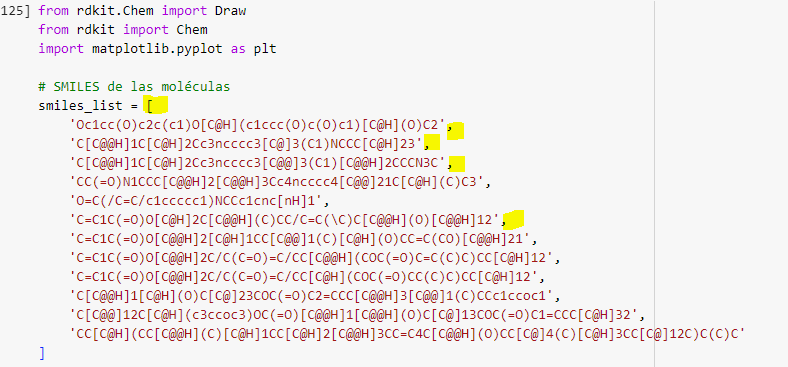

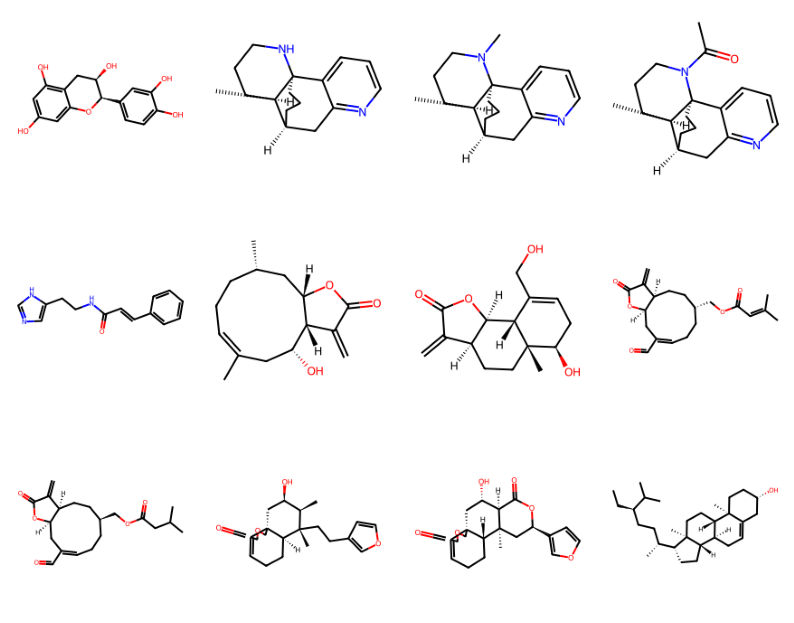

In [ ]:
from rdkit.Chem import Draw
from rdkit import Chem
import matplotlib.pyplot as plt

# SMILES of molecules
smiles_list = [
    'smiles, smiles, smiles'
]

# Image size for 2D structures
size = (200, 200)

# List to store molecules
mols = []

# Process each SMILES and obtain the corresponding molecule
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mols.append(mol)

# Create a figure to display the images
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))

# Display the molecule images in subplots
for i, ax in enumerate(axes.flat):
    if i < len(mols):
        img = Draw.MolToImage(mols[i], size=size)
        ax.imshow(img)
        ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the images in a popup window
plt.show()

Tips for the next step:

1.   What you should do now is copy your smiles into a text file, name it to your liking, for example SMILESExample.smi; it is important that you save the file as .smi.
2.   Now, what you can do is using this notebook [texto del enlace](https://github.com/sbolivara16/A-simple-tool-for-openbabel/blob/main/Openbabel.ipynb  **GITHUB openbabel**), convert them to sdf, mol2, pdb, or pdbqt whatever your interest.


Enjoy 🌟🎉😄
